In [1]:
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import japanize_matplotlib

In [3]:
ELEMENTARY_SCHOOL_PATH = 'data/nl/A27-23_13.geojson'
ACCIDENT_PATH = 'data/honhyo_2019.csv'

In [4]:
gdf_school = gpd.read_file(ELEMENTARY_SCHOOL_PATH)
gdf_school

,A27_001,A27_002,A27_003,A27_004,A27_005,geometry
0,13104,新宿区立,B113210400163,戸塚第二小学校,新宿区高田馬場1-25-21,"POLYGON ((139.70251 35.70955, 139.70261 35.709..."
1,13111,大田区立,B113211100066,入新井第五小学校,大田区大森北6-4-8,"POLYGON ((139.73156 35.58080, 139.73156 35.581..."
2,13104,新宿区立,B113210400154,戸塚第一小学校,新宿区西早稲田3-10-12,"POLYGON ((139.72344 35.71034, 139.72343 35.710..."
3,13111,大田区立,B113211100057,大森第五小学校,大田区大森本町1-10-5,"MULTIPOLYGON (((139.77271 35.59554, 139.77325 ..."
4,13104,新宿区立,B113210400145,戸山小学校,新宿区百人町2-1-38,"POLYGON ((139.69911 35.69541, 139.69881 35.695..."
...,...,...,...,...,...,...
1200,13205,青梅市立,B113220500072,第七小学校,青梅市小會木3-1880-1,"POLYGON ((139.26019 35.80628, 139.25986 35.806..."
1201,13205,青梅市立,B113220500063,第六小学校,青梅市二俣尾3-903-1,"POLYGON ((139.14849 35.79431, 139.14852 35.794..."
1202,13104,新宿区立,B113210400190,落合第二小学校,新宿区上落合2-10-23,"POLYGON ((139.69430 35.71104, 139.69424 35.711..."
1203,13104,新宿区立,B113210400181,落合第一小学校,新宿区中落合2-13-27,"POLYGON ((139.68438 35.72265, 139.68438 35.722..."


In [6]:
df_accident = pd.read_csv(ACCIDENT_PATH, encoding='SHIFT-JIS')
df_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日)
0,1,10,59,1,2,0,1,40030,2,0,...,1,2,2,2,4,4,431412959,1414947029,6,3
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,2,4,4,425706029,1413039991,1,3
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,2,4,4,424115557,1414158530,3,3
3,1,10,59,4,2,0,1,40020,2,0,...,2,1,2,2,4,2,425647051,1413100440,7,3
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,2,4,2,425606992,1420518034,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381232,1,97,114,219,2,0,1,99000,0,0,...,2,0,2,0,4,2,261126462,1273936100,3,3
381233,1,97,114,220,2,0,1,33410,0,0,...,2,2,2,2,2,4,261050023,1274106406,3,3
381234,1,97,114,221,2,0,1,27210,0,0,...,2,0,2,0,4,2,261137658,1273954846,5,3
381235,1,97,114,222,2,0,1,27560,0,0,...,2,0,2,0,4,2,261036685,1274032836,4,3


In [7]:
def to_degree(v):
    d = v // 10000000
    m = (v - d * 10000000) // 100000
    s = v - d * 10000000 - m * 100000
    return d + m / 60 + s / (3600 * 1000)

df_accident['地点　緯度（北緯）'] = df_accident['地点　緯度（北緯）'].apply(to_degree)
df_accident['地点　経度（東経）'] = df_accident['地点　経度（東経）'].apply(to_degree)
df_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日)
0,1,10,59,1,2,0,1,40030,2,0,...,1,2,2,2,4,4,43.236933,141.829730,6,3
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,2,4,4,42.951675,141.511109,1,3
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,2,4,4,42.687655,141.699592,3,3
3,1,10,59,4,2,0,1,40020,2,0,...,2,1,2,2,4,2,42.946403,141.516789,7,3
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,2,4,2,42.935276,142.088343,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381232,1,97,114,219,2,0,1,99000,0,0,...,2,0,2,0,4,2,26.190684,127.660028,3,3
381233,1,97,114,220,2,0,1,33410,0,0,...,2,2,2,2,2,4,26.180562,127.685113,3,3
381234,1,97,114,221,2,0,1,27210,0,0,...,2,0,2,0,4,2,26.193794,127.665235,5,3
381235,1,97,114,222,2,0,1,27560,0,0,...,2,0,2,0,4,2,26.176857,127.675788,4,3


In [8]:
gdf_accident = gpd.GeoDataFrame(df_accident, geometry=gpd.points_from_xy(df_accident['地点　経度（東経）'], df_accident['地点　緯度（北緯）']), crs=4326)
gdf_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),geometry
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,43.236933,141.829730,6,3,POINT (141.82973 43.23693)
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,42.951675,141.511109,1,3,POINT (141.51111 42.95167)
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,42.687655,141.699592,3,3,POINT (141.69959 42.68765)
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,42.946403,141.516789,7,3,POINT (141.51679 42.94640)
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,42.935276,142.088343,2,2,POINT (142.08834 42.93528)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381232,1,97,114,219,2,0,1,99000,0,0,...,0,2,0,4,2,26.190684,127.660028,3,3,POINT (127.66003 26.19068)
381233,1,97,114,220,2,0,1,33410,0,0,...,2,2,2,2,4,26.180562,127.685113,3,3,POINT (127.68511 26.18056)
381234,1,97,114,221,2,0,1,27210,0,0,...,0,2,0,4,2,26.193794,127.665235,5,3,POINT (127.66524 26.19379)
381235,1,97,114,222,2,0,1,27560,0,0,...,0,2,0,4,2,26.176857,127.675788,4,3,POINT (127.67579 26.17686)


In [9]:
gdf_school = gdf_school.to_crs(epsg=4326)
gdf_accident_school = gdf_accident.sjoin(gdf_school, predicate='within')
gdf_accident_school

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),geometry,index_right,A27_001,A27_002,A27_003,A27_004,A27_005
2634,1,30,69,1,1,1,0,50230,1,0,...,139.806066,5,3,POINT (139.80607 35.66184),419,13108,江東区立,B113210800141,枝川小学校,江東区枝川3-5-3
2635,1,30,69,2,2,0,1,50240,2,0,...,139.788663,3,3,POINT (139.78866 35.67921),854,13102,中央区立,B113210200067,有馬小学校,中央区日本橋蛎殼町2-10-23
2636,1,30,69,3,2,0,2,50120,2,0,...,139.684695,6,3,POINT (139.68470 35.65066),629,13110,目黒区立,B113211000227,東山小学校,目黒区東山2-24-25
2637,1,30,69,4,2,0,1,50290,1,0,...,139.689116,1,1,POINT (139.68912 35.71884),1203,13104,新宿区立,B113210400181,落合第一小学校,新宿区中落合2-13-27
2638,1,30,69,5,2,0,1,50280,2,0,...,139.830703,3,3,POINT (139.83070 35.64688),489,13108,江東区立,B113210800418,南砂小学校,江東区南砂2-3-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351481,1,30,895,366,2,0,1,30000,0,0,...,139.461239,2,3,POINT (139.46124 35.73575),611,13211,小平市立,B113221100136,小平第十三小学校,小平市小川西町1-22-1
351482,1,30,898,2,2,0,2,20000,0,0,...,139.549090,4,3,POINT (139.54909 34.06268),1081,13381,三宅村立,B113238100014,三宅小学校,三宅村伊豆468
351483,1,30,899,14,2,0,1,20000,0,0,...,139.793584,6,3,POINT (139.79358 33.11188),673,13401,八丈町立,B113240100010,三根小学校,八丈町三根341
353641,1,43,59,436,2,0,3,50340,2,0,...,139.316313,2,3,POINT (139.31631 35.79526),1196,13205,青梅市立,B113220500090,新町小学校,青梅市新町5-21-1


In [10]:
df_accident_count = gdf_accident_school.groupby('A27_003')[['本票番号']].count()
df_accident_count = df_accident_count.reset_index()
df_accident_count = df_accident_count.rename(columns={
    '本票番号': 'count'
})
df_accident_count

,A27_003,count
0,B113210100013,128
1,B113210100022,20
2,B113210100031,11
3,B113210100040,47
4,B113210100059,137
...,...,...
1194,B113240100010,5
1195,B113240100029,5
1196,B113240100038,4
1197,B113242100016,2


In [11]:
gdf_school_accident_count = gdf_school.merge(df_accident_count)
gdf_school_accident_count

,A27_001,A27_002,A27_003,A27_004,A27_005,geometry,count
0,13104,新宿区立,B113210400163,戸塚第二小学校,新宿区高田馬場1-25-21,"POLYGON ((139.70251 35.70955, 139.70261 35.709...",19
1,13111,大田区立,B113211100066,入新井第五小学校,大田区大森北6-4-8,"POLYGON ((139.73156 35.58080, 139.73156 35.581...",32
2,13104,新宿区立,B113210400154,戸塚第一小学校,新宿区西早稲田3-10-12,"POLYGON ((139.72344 35.71034, 139.72343 35.710...",10
3,13111,大田区立,B113211100057,大森第五小学校,大田区大森本町1-10-5,"MULTIPOLYGON (((139.77271 35.59554, 139.77325 ...",99
4,13104,新宿区立,B113210400145,戸山小学校,新宿区百人町2-1-38,"POLYGON ((139.69911 35.69541, 139.69881 35.695...",35
...,...,...,...,...,...,...,...
1194,13205,青梅市立,B113220500072,第七小学校,青梅市小會木3-1880-1,"POLYGON ((139.26019 35.80628, 139.25986 35.806...",10
1195,13205,青梅市立,B113220500063,第六小学校,青梅市二俣尾3-903-1,"POLYGON ((139.14849 35.79431, 139.14852 35.794...",11
1196,13104,新宿区立,B113210400190,落合第二小学校,新宿区上落合2-10-23,"POLYGON ((139.69430 35.71104, 139.69424 35.711...",14
1197,13104,新宿区立,B113210400181,落合第一小学校,新宿区中落合2-13-27,"POLYGON ((139.68438 35.72265, 139.68438 35.722...",22


In [12]:
gdf_school_accident_count.sort_values('count', ascending=False)

,A27_001,A27_002,A27_003,A27_004,A27_005,geometry,count
336,13103,港区立,B113210300146,御成門小学校,港区芝公園3-2-4,"POLYGON ((139.76027 35.65239, 139.76000 35.652...",259
56,13101,千代田区立,B113210100068,千代田小学校,千代田区神田司町2-16,"POLYGON ((139.76527 35.69383, 139.76598 35.694...",242
348,13103,港区立,B113210300075,麻布小学校,港区麻布台1-5-15,"POLYGON ((139.74523 35.65465, 139.74417 35.654...",160
334,13103,港区立,B113210300155,赤坂小学校,港区赤坂8-13-29,"POLYGON ((139.73964 35.66776, 139.73930 35.667...",148
57,13101,千代田区立,B113210100059,お茶の水小学校,千代田区神田猿楽町1-1-1,"POLYGON ((139.75625 35.69056, 139.75571 35.691...",137
...,...,...,...,...,...,...,...
1198,13104,新宿区立,B113210400172,戸塚第三小学校,新宿区高田馬場3-18-21,"POLYGON ((139.70236 35.70946, 139.70213 35.709...",2
823,13201,八王子市立,B113220100664,七国小学校,八王子市七国5-27-1,"POLYGON ((139.31769 35.61570, 139.31716 35.616...",1
838,13201,八王子市立,B113220100637,長池小学校,八王子市別所1-55,"POLYGON ((139.38474 35.61601, 139.38524 35.616...",1
256,13363,新島村立,B113236300016,新島小学校,新島村本村2-1-1,"POLYGON ((139.26686 34.40851, 139.26686 34.408...",1


<Axes: >

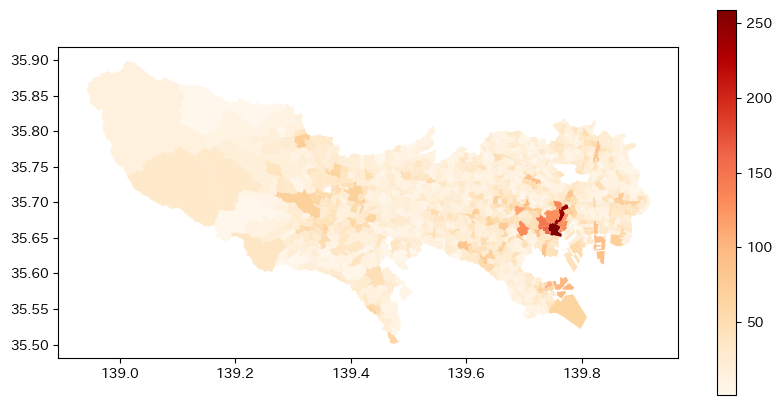

In [13]:
min_lon, min_lat = 138.0, 35.0
max_lon, max_lat = 140.0, 36.0
   
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])

gdf_school_accident_count_clipped = gdf_school_accident_count[gdf_school_accident_count.within(bbox_polygon)]
gdf_school_accident_count_clipped.plot(column='count', cmap='OrRd', figsize=(10, 5), legend=True)

In [14]:
df_accident_school_bike = gdf_accident_school[(gdf_accident_school['当事者種別（当事者A）'] == 51) | (gdf_accident_school['当事者種別（当事者B）'] == 51)]
df_accident_school_bike

df_accident_count = df_accident_school_bike.groupby('A27_003')[['負傷者数']].sum()
df_accident_count = df_accident_count.reset_index()
df_accident_count = df_accident_count.rename(columns={
    '負傷者数': 'count'
})
df_accident_count

,A27_003,count
0,B113210100013,19
1,B113210100022,3
2,B113210100040,9
3,B113210100059,27
4,B113210100068,61
...,...,...
1164,B113240100010,3
1165,B113240100029,2
1166,B113240100038,1
1167,B113242100016,1


In [15]:
gdf_school_accident_count = gdf_school.merge(df_accident_count)
gdf_school_accident_count

,A27_001,A27_002,A27_003,A27_004,A27_005,geometry,count
0,13104,新宿区立,B113210400163,戸塚第二小学校,新宿区高田馬場1-25-21,"POLYGON ((139.70251 35.70955, 139.70261 35.709...",1
1,13111,大田区立,B113211100066,入新井第五小学校,大田区大森北6-4-8,"POLYGON ((139.73156 35.58080, 139.73156 35.581...",19
2,13104,新宿区立,B113210400154,戸塚第一小学校,新宿区西早稲田3-10-12,"POLYGON ((139.72344 35.71034, 139.72343 35.710...",2
3,13111,大田区立,B113211100057,大森第五小学校,大田区大森本町1-10-5,"MULTIPOLYGON (((139.77271 35.59554, 139.77325 ...",36
4,13104,新宿区立,B113210400145,戸山小学校,新宿区百人町2-1-38,"POLYGON ((139.69911 35.69541, 139.69881 35.695...",10
...,...,...,...,...,...,...,...
1164,13215,国立市立,B113221500052,国立第五小学校,国立市富士見台2-47-2,"POLYGON ((139.44141 35.68778, 139.44132 35.690...",7
1165,13205,青梅市立,B113220500081,河辺小学校,青梅市河辺町5-24,"POLYGON ((139.29661 35.77897, 139.29658 35.778...",10
1166,13215,国立市立,B113221500043,国立第四小学校,国立市北2-29,"POLYGON ((139.44800 35.70081, 139.44824 35.700...",17
1167,13104,新宿区立,B113210400190,落合第二小学校,新宿区上落合2-10-23,"POLYGON ((139.69430 35.71104, 139.69424 35.711...",2


In [16]:
gdf_school_accident_count.sort_values('count', ascending=False)

,A27_001,A27_002,A27_003,A27_004,A27_005,geometry,count
55,13101,千代田区立,B113210100068,千代田小学校,千代田区神田司町2-16,"POLYGON ((139.76527 35.69383, 139.76598 35.694...",61
330,13103,港区立,B113210300146,御成門小学校,港区芝公園3-2-4,"POLYGON ((139.76027 35.65239, 139.76000 35.652...",60
133,13121,足立区立,B113212100297,綾瀬小学校,足立区東綾瀬1-5-3,"POLYGON ((139.81974 35.76044, 139.81977 35.760...",52
329,13123,江戸川区立,B113212300106,第三松江小学校,江戸川区中央4-13-1,"POLYGON ((139.85669 35.70089, 139.85667 35.701...",47
261,13106,台東区立,B113210600152,上野小学校,台東区東上野6-16-8,"POLYGON ((139.78214 35.70856, 139.78205 35.707...",43
...,...,...,...,...,...,...,...
765,13209,町田市立,B113220900381,本町田小学校,町田市本町田2032,"POLYGON ((139.43953 35.55727, 139.43893 35.557...",1
543,13108,江東区立,B113210800329,第二辰巳小学校,江東区辰巳1-1-22,"MULTIPOLYGON (((139.80539 35.64817, 139.80573 ...",1
750,13201,八王子市立,B113220100469,高嶺小学校,八王子市北野台4-21-1,"POLYGON ((139.35840 35.63104, 139.35825 35.631...",1
749,13201,八王子市立,B113220100478,弐分方小学校,八王子市弐分方町520-1,"POLYGON ((139.28396 35.67660, 139.28446 35.676...",1


<Axes: >

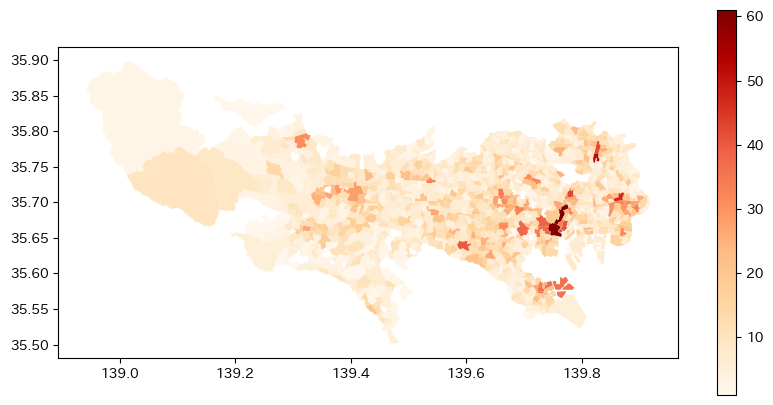

In [17]:
min_lon, min_lat = 138.0, 35.0
max_lon, max_lat = 140.0, 36.0
   
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])

gdf_school_accident_count_clipped = gdf_school_accident_count[gdf_school_accident_count.within(bbox_polygon)]
gdf_school_accident_count_clipped.plot(column='count', cmap='OrRd', figsize=(10, 5), legend=True)